# 1. Pengumpulan Data
Dataset didapatkan dari : https://archive.ics.uci.edu/dataset/45/heart+disease

Data yang digunakan yaitu file 'hungarian.data' dimana deskripsinya terdapat pada file 'heart-disease.names'

# 2. Menelaah Data

## Import Libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import streamlit as st
from streamlit_jupyter import StreamlitPatcher

## Load Data

In [ ]:
file_path = 'heart+disease\hungarian.data'

with open(file_path, 'r') as file:
    raw_data = file.read()

raw_data = raw_data.strip().split('name')
raw_data.pop()
cleaned_data = [string.replace('\n\n', ' ').replace('\n', ' ').strip().split(' ') for string in raw_data]
data = pd.DataFrame(cleaned_data)
data = data.astype(float)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


# 3. Validasi Data

Merubah data -9.0 menjadi nan, dikarenakan dalam dokumentasi nilai tersebut merupakan missing value.

In [ ]:
data = data.where(data >= 0, np.nan)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


# 4. Menentukan Fitur Data

sesuai dengan dokumentasi terdapat 14 fitur yang digunakan yaitu : 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'

In [ ]:
column_feature = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
data_filtered = data.iloc[:, column_feature]

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

data_filtered = data_filtered.rename(columns=column_mapping)
data_filtered.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


# 5. Membersihkan Data

mengisi null value / nan dalam data dengan rata rata, mengahapus data duplikasi

In [ ]:
data_filtered.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [ ]:
meanTrestbps = round(data_filtered.trestbps.dropna().mean())
meanChol = round(data_filtered.chol.dropna().mean())
meanFbs = round(data_filtered.fbs.dropna().mean())
meanRestecg = round(data_filtered.restecg.dropna().mean())
meanThalach = round(data_filtered.thalach.dropna().mean())
meanExang = round(data_filtered.exang.dropna().mean())
meanSlope = round(data_filtered.slope.dropna().mean())
meanCa = round(data_filtered.ca.dropna().mean())
meanThal = round(data_filtered.thal.dropna().mean())

In [ ]:
mean_values = {
    'trestbps': meanTrestbps,
    'chol': meanChol,
    'fbs': meanFbs,
    'restecg': meanRestecg,
    'thalach': meanThalach,
    'exang': meanExang,
    'slope': meanSlope,
    'ca': meanCa,
    'thal': meanThal
}

data_cleaned = data_filtered.fillna(value=mean_values)
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,2.0,6.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,2.0,6.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,2.0,6.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,2.0,6.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,2.0,6.0,0.0


In [ ]:
data_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,2.0,6.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,2.0,6.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,2.0,6.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,2.0,6.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,2.0,6.0,0.0


<Axes: >

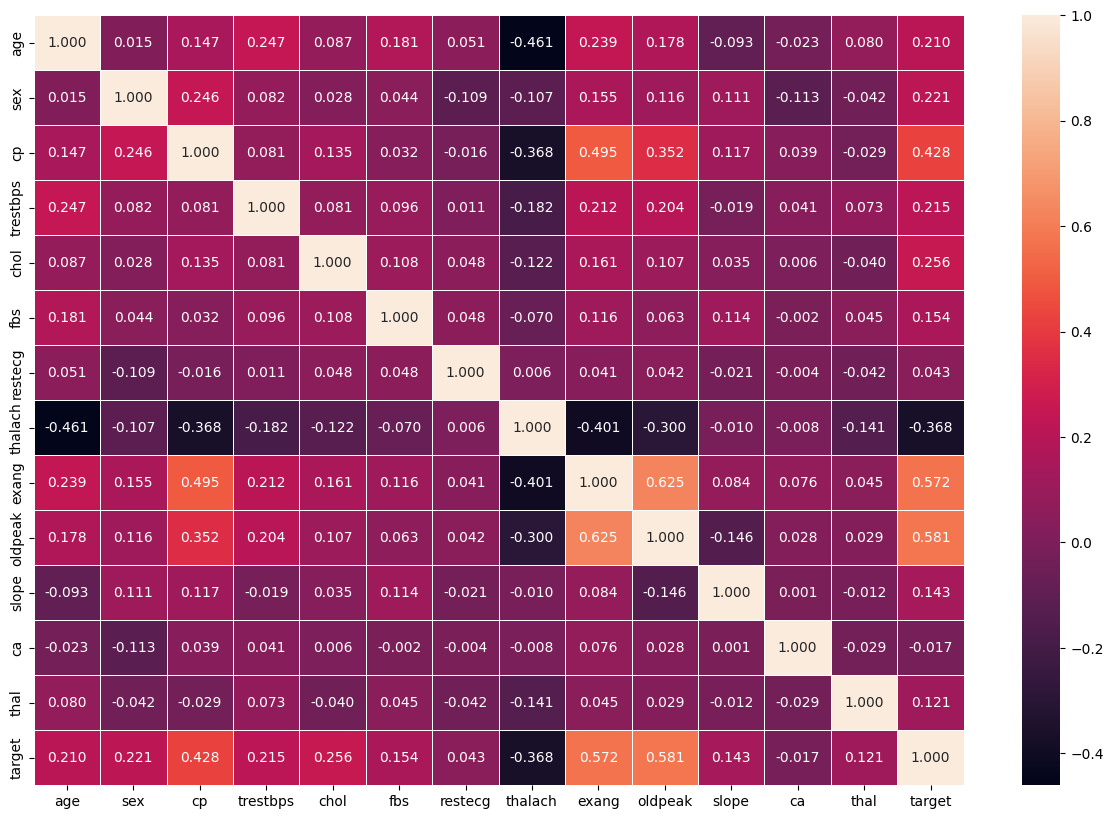

In [ ]:
cor_mat=data_cleaned.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 6.Konstruksi Data
penyesuaian fitur data, pemisahan label dengan fitur, penanganan data inbalance, normalisasi data

In [ ]:
X = data_cleaned.drop("target",axis=1).values
y = data_cleaned.iloc[:,-1]

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64


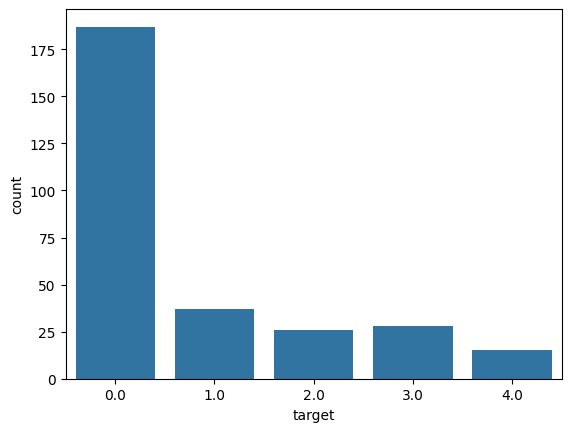

In [ ]:
print(data_cleaned['target'].value_counts())

sns.countplot(x="target", data=data_cleaned)
plt.show()

In [ ]:
# Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

# Undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

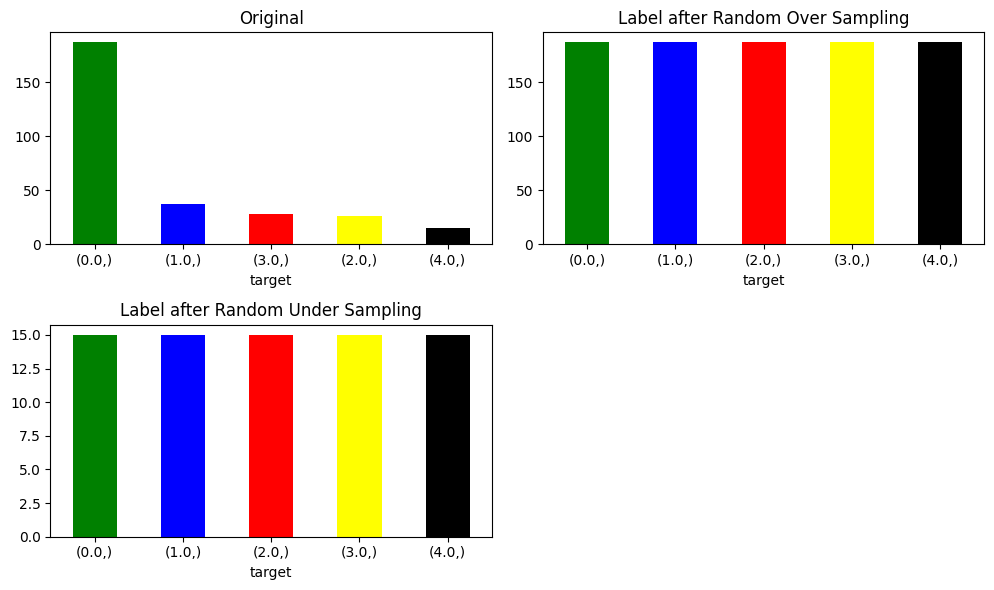

In [ ]:
plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 2, 1)
label = pd.DataFrame(data=y)
label.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Original")
plt.xticks(rotation=0)

# Subplot 2
plt.subplot(2, 2, 2)
label_smote = pd.DataFrame(data=y_ros)
label_smote.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Over Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot 3
plt.subplot(2, 2, 3)
label_tomekLinks = pd.DataFrame(data=y_rus)
label_tomekLinks.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Under Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [ ]:
temp = pd.DataFrame(X)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,1.962457,2.003413,5.965870
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,0.207620,0.457048,0.502251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,2.000000,6.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,2.000000,6.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,2.000000,6.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,9.000000,7.000000


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_ros = scaler.fit_transform(X_ros)
X_rus = scaler.fit_transform(X_rus)

In [ ]:
temp = pd.DataFrame(X)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.521645,0.726962,0.662116,0.376501,0.320193,0.068259,0.109215,0.528315,0.303754,0.117611,0.481229,0.222601,0.741468
std,0.205918,0.446282,0.321683,0.162748,0.125597,0.252622,0.230434,0.218130,0.460665,0.181911,0.103810,0.050783,0.125563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368421,0.000000,0.333333,0.259259,0.243243,0.000000,0.000000,0.370370,0.000000,0.000000,0.500000,0.222222,0.750000
50%,0.552632,1.000000,0.666667,0.351852,0.314672,0.000000,0.000000,0.537037,0.000000,0.000000,0.500000,0.222222,0.750000
75%,0.684211,1.000000,1.000000,0.444444,0.370656,0.000000,0.000000,0.675926,1.000000,0.200000,0.500000,0.222222,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42,stratify=y_ros)
X_valid_ros, X_test_ros, y_valid_ros, y_test_ros = train_test_split(X_test_ros, y_test_ros, test_size=0.5, random_state=42, stratify=y_test_ros)

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42,stratify=y_rus)
X_valid_rus, X_test_rus, y_valid_rus, y_test_rus = train_test_split(X_test_rus, y_test_rus, test_size=0.5, random_state=42, stratify=y_test_rus)


# 7. Model


## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

knn_model_ros = KNeighborsClassifier(n_neighbors = 3)
knn_model_ros.fit(X_train_ros, y_train_ros)

knn_model_rus = KNeighborsClassifier(n_neighbors = 3)
knn_model_rus.fit(X_train_rus, y_train_rus)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy KNN Original Dataset:", accuracy_knn)

y_pred_knn_ros = knn_model_ros.predict(X_test_ros)
accuracy_knn_ros = round(accuracy_score(y_test_ros,y_pred_knn_ros),3)
print("Accuracy KNN Random Over Sampling Dataset:", accuracy_knn_ros)

y_pred_knn_rus = knn_model_rus.predict(X_test_rus)
accuracy_knn_rus = round(accuracy_score(y_test_rus,y_pred_knn_rus),3)
print("Accuracy KNN Random Under Sampling Dataset:", accuracy_knn_rus)

Accuracy KNN Original Dataset: 0.614
Accuracy KNN Random Over Sampling Dataset: 0.908
Accuracy KNN Random Under Sampling Dataset: 0.167


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_knn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_knn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.17      0.17      0.17         6
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.61        44
   macro avg       0.19      0.22      0.20        44
weighted avg       0.51      0.61      0.56        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        28
         1.0       0.89      0.89      0.89        28
         2.0       0.84      0.96      0.90        28
         3.0       0.88      0.97      0.92        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.91       141
   macro avg       0.92      0.91      0.91       141
weighted avg       0.92    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_model_ros = SVC()
svm_model_ros.fit(X_train_ros, y_train_ros)

svm_model_rus = SVC()
svm_model_rus.fit(X_train_rus, y_train_rus)

SVC()

In [ ]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy SVM Original Dataset:", accuracy_svm)

y_pred_svm_ros = svm_model_ros.predict(X_test_ros)
accuracy_svm_ros = round(accuracy_score(y_test_ros,y_pred_svm_ros),3)
print("Accuracy SVM Random Over Sampling Dataset:", accuracy_svm_ros)

y_pred_svm_rus = svm_model_rus.predict(X_test_rus)
accuracy_svm_rus = round(accuracy_score(y_test_rus,y_pred_svm_rus),3)
print("Accuracy SVM Random Under Sampling Dataset:", accuracy_svm_rus)

Accuracy SVM Original Dataset: 0.682
Accuracy SVM Random Over Sampling Dataset: 0.596
Accuracy SVM Random Under Sampling Dataset: 0.333


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_svm_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_svm_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       0.00      0.00      0.00         6
         2.0       0.29      0.50      0.36         4
         3.0       0.33      0.25      0.29         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.28      0.34      0.30        44
weighted avg       0.56      0.68      0.61        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        28
         1.0       0.48      0.54      0.51        28
         2.0       0.50      0.89      0.64        28
         3.0       0.56      0.31      0.40        29
         4.0       0.68      0.46      0.55        28

    accuracy                           0.60       141
   macro avg       0.62      0.60      0.59       141
weighted avg       0.62    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_model_ros = DecisionTreeClassifier()
dt_model_ros.fit(X_train_ros, y_train_ros)

dt_model_rus = DecisionTreeClassifier()
dt_model_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,y_pred_dt),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_dt)

y_pred_dt_ros = dt_model_ros.predict(X_test_ros)
accuracy_dt_ros = round(accuracy_score(y_test_ros,y_pred_dt_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_dt_ros)

y_pred_dt_rus = dt_model_rus.predict(X_test_rus)
accuracy_dt_rus = round(accuracy_score(y_test_rus,y_pred_dt_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_dt_rus)

Accuracy Decision Tree Original Dataset: 0.682
Accuracy Decision Tree Random Over Sampling Dataset: 0.95
Accuracy Decision Tree Random Under Sampling Dataset: 0.417


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dt_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dt_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        28
         1.0       0.67      0.33      0.44         6
         2.0       0.20      0.25      0.22         4
         3.0       1.00      0.25      0.40         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.54      0.35      0.39        44
weighted avg       0.72      0.68      0.67        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        28
         1.0       0.88      1.00      0.93        28
         2.0       0.97      1.00      0.98        28
         3.0       0.97      1.00      0.98        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.95       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.95    

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_ros = RandomForestClassifier()
rf_model_ros.fit(X_train_ros, y_train_ros)

rf_model_rus = RandomForestClassifier()
rf_model_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_rf)

y_pred_rf_ros = rf_model_ros.predict(X_test_ros)
accuracy_rf_ros = round(accuracy_score(y_test_ros,y_pred_rf_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_rf_ros)

y_pred_rf_rus = rf_model_rus.predict(X_test_rus)
accuracy_rf_rus = round(accuracy_score(y_test_rus,y_pred_rf_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_rf_rus)

Accuracy Decision Tree Original Dataset: 0.659
Accuracy Decision Tree Random Over Sampling Dataset: 0.972
Accuracy Decision Tree Random Under Sampling Dataset: 0.333


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_rf_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_rf_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.67      0.33      0.44         6
         2.0       0.25      0.25      0.25         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.66        44
   macro avg       0.34      0.30      0.31        44
weighted avg       0.60      0.66      0.62        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        28
         1.0       0.97      1.00      0.98        28
         2.0       0.97      1.00      0.98        28
         3.0       0.97      1.00      0.98        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ANN

In [ ]:
def create_model_ann() :
    model_ann = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_ann


In [ ]:
ann_model = create_model_ann()
ann_model_ros = create_model_ann()
ann_model_rus = create_model_ann()

In [ ]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
ann_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
ann_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [ ]:
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)
accuracy_ann = round(accuracy_score(y_test,y_pred_ann),3)
print("Accuracy Artificial Neural Network Original Dataset:", accuracy_ann)

y_pred_ann_ros = np.argmax(ann_model_ros.predict(X_test_ros), axis=1)
accuracy_ann_ros = round(accuracy_score(y_test_ros,y_pred_ann_ros),3)
print("Accuracy Artificial Neural Network Random Over sampling Dataset:", accuracy_ann_ros)

y_pred_ann_rus = np.argmax(ann_model_rus.predict(X_test_rus), axis=1)
accuracy_ann_rus = round(accuracy_score(y_test_rus,y_pred_ann_rus),3)
print("Accuracy Artificial Neural Network Random Under Sampling Dataset:", accuracy_ann_rus)

2/2 [==============================] - 0s 4ms/step
Accuracy Artificial Neural Network Original Dataset: 0.705
5/5 [==============================] - 0s 3ms/step
Accuracy Artificial Neural Network Random Over sampling Dataset: 0.532
1/1 [==============================] - 0s 108ms/step
Accuracy Artificial Neural Network Random Under Sampling Dataset: 0.333


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_ann_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_ann_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       1.00      0.17      0.29         6
         2.0       0.29      0.50      0.36         4
         3.0       0.50      0.25      0.33         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.70        44
   macro avg       0.52      0.38      0.37        44
weighted avg       0.71      0.70      0.66        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74        28
         1.0       0.56      0.32      0.41        28
         2.0       0.49      0.79      0.60        28
         3.0       0.44      0.28      0.34        29
         4.0       0.45      0.54      0.49        28

    accuracy                           0.53       141
   macro avg       0.53      0.53      0.52       141
weighted avg       0.53    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## DNN

In [ ]:
def create_model_dnn() :
    model_dnn = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model_dnn


In [ ]:
dnn_model = create_model_dnn()
dnn_model_ros = create_model_dnn()
dnn_model_rus = create_model_dnn()

In [ ]:
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
dnn_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
dnn_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [ ]:
y_pred_dnn = np.argmax(dnn_model.predict(X_test), axis=1)
accuracy_dnn = round(accuracy_score(y_test,y_pred_dnn),3)
print("Accuracy Deep Neural Network Original Dataset:", accuracy_dnn)

y_pred_dnn_ros = np.argmax(dnn_model_ros.predict(X_test_ros), axis=1)
accuracy_dnn_ros = round(accuracy_score(y_test_ros,y_pred_dnn_ros),3)
print("Accuracy Deep Neural Network Random Over Sampling Dataset:", accuracy_dnn_ros)

y_pred_dnn_rus = np.argmax(dnn_model_rus.predict(X_test_rus), axis=1)
accuracy_dnn_rus = round(accuracy_score(y_test_rus,y_pred_dnn_rus),3)
print("Accuracy Deep Neural Network Random Under Sampling Dataset:", accuracy_dnn_rus)

2/2 [==============================] - 0s 2ms/step
Accuracy Deep Neural Network Original Dataset: 0.705
5/5 [==============================] - 0s 3ms/step
Accuracy Deep Neural Network Random Over Sampling Dataset: 0.865
1/1 [==============================] - 0s 75ms/step
Accuracy Deep Neural Network Random Under Sampling Dataset: 0.25


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dnn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dnn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       1.00      0.33      0.50         6
         2.0       0.33      0.50      0.40         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.70        44
   macro avg       0.43      0.36      0.35        44
weighted avg       0.67      0.70      0.66        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        28
         1.0       0.95      0.71      0.82        28
         2.0       0.72      1.00      0.84        28
         3.0       0.96      0.90      0.93        29
         4.0       0.93      1.00      0.97        28

    accuracy                           0.87       141
   macro avg       0.88      0.87      0.86       141
weighted avg       0.88    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

# 8. Evaluasi
evaluasi hasil setiap model

In [ ]:
models = ['KNN', 'SVM', 'DT', 'RF', 'ANN', 'DNN']
accuracy_original = [accuracy_knn*100, accuracy_svm*100, accuracy_dt*100, accuracy_rf*100, accuracy_ann*100, accuracy_dnn*100]
accuracy_ros = [accuracy_knn_ros*100, accuracy_svm_ros*100, accuracy_dt_ros*100, accuracy_rf_ros*100, accuracy_ann_ros*100, accuracy_dnn_ros*100]
accuracy_rus = [accuracy_knn_rus*100, accuracy_svm_rus*100, accuracy_dt_rus*100, accuracy_rf_rus*100, accuracy_ann_rus*100, accuracy_dnn_rus*100]

data = {
    'Accuracy Original': accuracy_original,
    'Accuracy ROS': accuracy_ros,
    'Accuracy RUS': accuracy_rus
}

result_df = pd.DataFrame(data, index=models)
result_df

,Accuracy Original,Accuracy ROS,Accuracy RUS
KNN,61.4,90.8,16.7
SVM,68.2,59.6,33.3
DT,68.2,95.0,41.7
RF,65.9,97.2,33.3
ANN,70.5,53.2,33.3
DNN,70.5,86.5,25.0


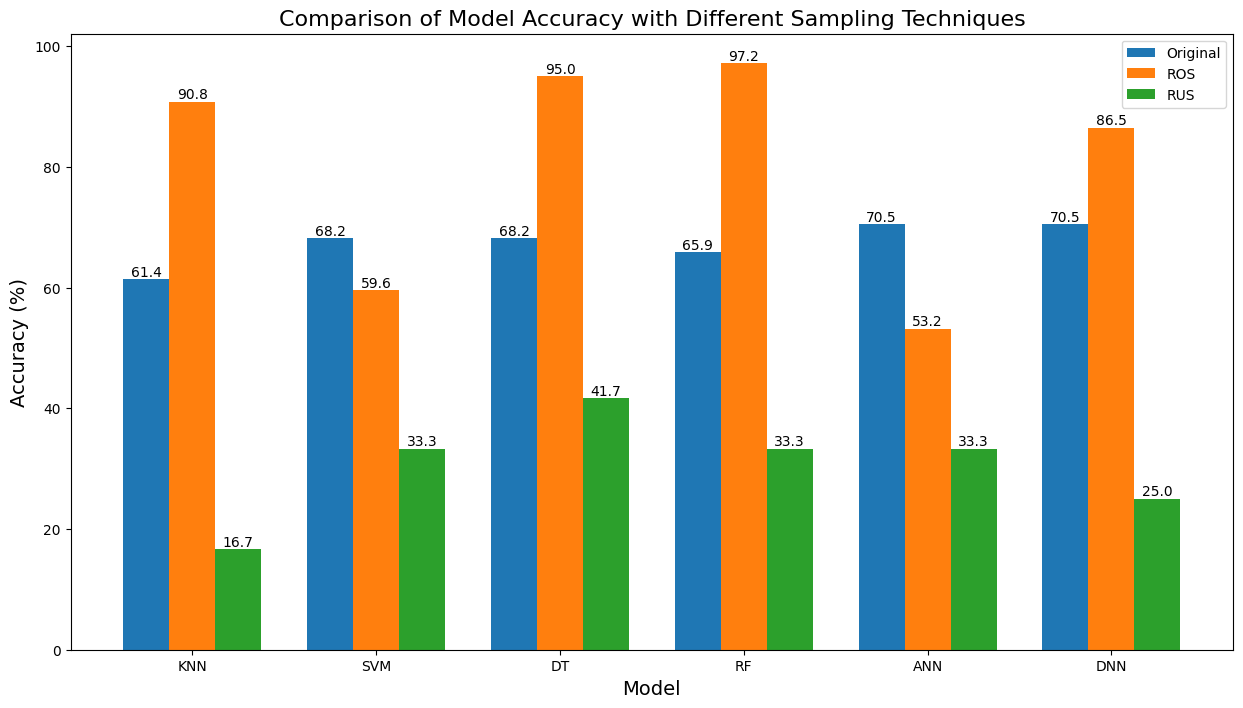

In [ ]:
bar_width = 0.25
index = range(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(index, accuracy_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], accuracy_ros, bar_width, label='ROS')
bar3 = ax.bar([i + 2 * bar_width for i in index], accuracy_rus, bar_width, label='RUS')

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Comparison of Model Accuracy with Different Sampling Techniques', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.show()

# 9. Streamlit
menyimpan model terbaik, membuat tampilan web untuk presentasi model (streamlit_demo.py)

In [ ]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(rf_model_ros, file)

# 10. Kesimpulan

Dari hasil eksperimen yang dilakukan pada dataset HeartDisease dengan tiga kondisi (original, random over sampling/ROS, dan random under sampling/RUS) menggunakan beberapa algoritma machine learning, dapat diambil beberapa kesimpulan:

1. **Original Data:**
   - **KNN:** Akurasi rendah (61.4%), mungkin karena ketidakseimbangan kelas.
   - **SVM:** Akurasi cukup baik (68.2%), namun tetap ada ruang untuk perbaikan.
   - **Decision Tree (DT):** Akurasi baik (68.2%), namun masih bisa ditingkatkan.
   - **Random Forest (RF):** Akurasi cukup baik (65.9%), tetapi mungkin ada ruang untuk peningkatan.
   - **Artificial Neural Network (ANN):** Akurasi tinggi (70.5%), namun perlu diwaspadai jika ada overfitting.
   - **Deep Neural Network (DNN):** Akurasi tinggi (70.5%), namun perlu diwaspadai overfitting.

2. **Random Over Sampling (ROS):**
   - Secara umum, terjadi peningkatan akurasi untuk semua model. Peningkatan ini mungkin disebabkan oleh penanganan ketidakseimbangan kelas dengan menambahkan sampel dari kelas minoritas.
   - KNN dan DT mencapai akurasi yang cukup tinggi setelah proses ROS.

3. **Random Under Sampling (RUS):**
   - Peningkatan akurasi terlihat pada beberapa model, tetapi tidak sebesar ROS.
   - Dalam beberapa kasus, seperti SVM dan DNN, akurasi setelah RUS bisa lebih rendah dibandingkan dengan kondisi original. Ini mungkin disebabkan oleh kehilangan informasi yang signifikan akibat pengurangan sampel dari kelas mayoritas.

4. **General Observations:**
   - Model Decision Tree (DT) dan Random Forest (RF) cenderung tampil baik pada kondisi original dan ROS.
   - SVM cenderung lebih baik pada kondisi asli, sementara beberapa model neural network (ANN dan DNN) mungkin lebih sensitif terhadap perubahan pada data setelah dilakukan penanganan ketidakseimbangan.